# <font color = 'navy'> 데이터 수집

In [15]:
import warnings
warnings.filterwarnings("ignore")

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import requests

In [19]:
## 주어진 url에 있는 포스트의 제목/본문 내용을 추출하는 함수
def parse_blog_post(driver, url):
    
    driver.get(url) # 해당 url에 접속
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'lxml') # 웹 페이지의 소스코드를 BeatifulSoup를 이용해 파싱
    
    # ifrmae의 src URL을 추출    
    iframe_tag = soup.find('iframe')
    if iframe_tag is not None: 
        iframe_src = iframe_tag['src']
    else:
        return None # 만약 iframe 태그가 없다면 None을 반환
    
    # iframe_src가 상대 URL일 경우 'https://blog.naver.com'을 추가
    if not iframe_src.startswith('http'):
        iframe_src = 'https://blog.naver.com' + iframe_src
        
    # 본문 URL로 다시 요청
    res = requests.get(iframe_src)
    res.raise_for_status() # 요청이 실패하면 예외 발생시킴
    soup = BeautifulSoup(res.text, 'lxml') # 요청한 결과를 다시 BeatifulSoup로 파싱
    
    # 블로그 제목 추출
    title_tag = soup.find('meta', property='og:title')
    if title_tag is not None:
        title = title_tag['content']
    else:
        return None
    
    # 블로그 본문 추출
    content_tag = soup.find('div', {'class': ['se-main-container', 'se_component_wrap sect_dsc __se_component_area']})
    if content_tag is not None:
        content = content_tag.get_text()
    else:
        return None
    
    return {
        'title': title,
        'content': content
    }


## 크롤링하는 메인 함수 -> 각 포스트의 링크를 저장한 후 위의 함수를 이용하여 데이터 추출
def get_result(query, page_count=100):
    
    blog_posts = [] # 데이터를 저장할 리스트

    driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화

    for page in range(1, page_count + 1): # 지정한 페이지 수만큼 반복
        
        url = f'https://search.naver.com/search.naver?where=post&sm=tab_jum&query={query}&start={30 * (page-1) + 1}'
        driver.get(url)
        time.sleep(3)

        soup = BeautifulSoup(driver.page_source, 'html.parser') # 페이지 HDML 파싱
        links = soup.select('a.api_txt_lines.total_tit') # 링크 저장
 
        for link in links:
            post_link = link['href']
            
            try: # 크롤링 도중 문제가 발생할 경우를 대비해 예외 처리
                post = parse_blog_post(driver, post_link)
            
                if post is not None: # 추출 결과가 None이 아닐  때만
                    post['link'] = post_link # 링크도 추가
                    blog_posts.append(post) # 추출 결과를 리스트에 추가
                
            except:
                continue


    driver.quit()  # 웹 드라이버 종료

    return blog_posts # 결과 리스트 반환

### <font color = 'navy'> 일본

In [2]:
import pandas as pd

In [2]:
query = '일본 여행'
japan_result = get_result(query)
Japan = pd.DataFrame(japan_result)
Japan.insert(0, 'country', '일본')

C:\Users\tjdus\AppData\Local\Temp\ipykernel_3324\945354754.py:54: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화


In [30]:
Japan.shape

(2397, 4)

### <font color = 'navy'> 미국

In [9]:
query = '미국 여행'
USA_result = get_result(query)
USA = pd.DataFrame(USA_result)
USA.insert(0, 'country', '미국')

C:\Users\tjdus\AppData\Local\Temp\ipykernel_3324\945354754.py:54: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화


In [31]:
USA.shape

(1952, 4)

### <font color = 'navy'> 태국

In [15]:
query = '태국 여행'
Thailand_result = get_result(query)
Thailand = pd.DataFrame(Thailand_result)
Thailand.insert(0, 'country', '태국')

C:\Users\tjdus\AppData\Local\Temp\ipykernel_3324\945354754.py:54: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화


In [32]:
Thailand.shape

(2168, 4)

### <font color = 'navy'> 이탈리아

In [20]:
query = '이탈리아 여행'
Italy_result = get_result(query)
Italy = pd.DataFrame(Italy_result)
Italy.insert(0, 'country', '이탈리아')

C:\Users\tjdus\AppData\Local\Temp\ipykernel_3324\2512493690.py:54: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화


In [33]:
Italy.shape

(2410, 4)

### <font color = 'navy'> 프랑스

In [24]:
query = '프랑스 여행'
France_result = get_result(query)
France = pd.DataFrame(France_result)
France.insert(0, 'country', '프랑스')

C:\Users\tjdus\AppData\Local\Temp\ipykernel_3324\2512493690.py:54: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/tjdus/Downloads/chromedriver_win32/chromedriver') # 웹 드라이버 초기화


In [34]:
France.shape

(1921, 4)

### <font color = 'navy'> 데이터 병합

In [10]:
total = pd.concat([JAPAN, USA, THAILAND, ITALY, FRANCE])
total = total.drop_duplicates() # 중복값 제거
total = total.reset_index(drop=True)

In [7]:
#total.to_csv('total_data.csv', index=False)

In [11]:
data = pd.read_csv('total_data.csv')

In [12]:
data

,country,title,content,link
0,일본,일본여행추천 도쿄맛집 긴자 미도리스시,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​일본여행추천 도쿄맛집 긴...,https://blog.naver.com/hacelluvia/223108143016
1,일본,일본 여행 후쿠오카 모츠나베 맛집 모츠나베 타슈 다이묘점,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​\n\n\n\n \n\n...,https://blog.naver.com/esilvia/223114234954
2,일본,일본여행준비물 교통패스 오사카 주유패스 예약 수령 인포,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​오사카여행을 앞두고 있는...,https://blog.naver.com/lsh5755/223115815690
3,일본,일본여행 홋카이도 렌트카 여행 계획짜는 중,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n안녕하세요. 여행 인플루언...,https://blog.naver.com/jamjma98/223085377457
4,일본,후쿠오카 유후인 여행 코스 버스투어 패키지 일본여행 추천,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\...,https://blog.naver.com/luvxox/223103066729
...,...,...,...,...
10772,프랑스,프랑스 여행 준비할 것,\n\n\n\n\n프랑스 여행을 준비하면서 이래저래 손품 발품 팔았던 경험을 토대로...,https://blog.naver.com/cheesekim1208/222993087365
10773,프랑스,"[프랑스 여행#4] 몽마르트 언덕에서 한끼, Deli's Cafe",\n\n\n\n\n\n\n/ 프랑스 여행#4 /Vacation to the Fran...,https://blog.naver.com/gpfla67/221223950594
10774,프랑스,[프랑스여행] 환상의 섬 코르시카 1편,\n\n\n\n\n나의 사전에 불가능은 없다.\n나폴레옹\n\n\n\n\n\n\n\...,https://blog.naver.com/vocae/221816426000
10775,프랑스,"프랑스 여행 추천, 숨겨진 프랑스 소도시 5곳","\n\n\n\n\n안녕하세요~프랑스 여행 하면 흔히 파리 에펠탑을 떠올릴 텐데요,프...",https://blog.naver.com/mastersalt/221805889050


# <font color = 'navy'> 데이터 전처리

In [14]:
import pykospacing
import soynlp
import konlpy
import re

C:\Users\tjdus\anaconda3\envs\text\lib\site-packages\flatbuffers\compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


## <font color = 'navy'> 1. Cleaning

#### <font color = 'navy'> 개행 문자 제거

In [5]:
data['content'] = data['content'].apply(lambda x: x.replace('\n', ' '))
data['content'] = data['content'].apply(lambda x: x.replace('\u200b', ' '))

#### <font color = 'navy'> 이모지 및 이모티콘 제거

In [8]:
# ASCII 코드 및 한글 유니코드 범위를 제외한 모든 문자 제거

def remove_non_ascii_except_korean(text):
    return re.sub(r'[^\x00-\x7F\uAC00-\uD7A3]+','', text)

In [9]:
data['content'] = data['content'].apply(lambda x: remove_non_ascii_except_korean(x))

#### <font color = 'navy'> 띄어쓰기 교정

In [16]:
spacer = pykospacing.Spacing()

In [12]:
from tqdm import tqdm
tqdm.pandas()

data['content'] = data['content'].progress_apply(lambda x: spacer(x))

100%|██████████████████████████████████████████████████████████████████████████| 10777/10777 [2:09:22<00:00,  1.39it/s]


#### <font color = 'navy'> 특수문자 제거

In [124]:
# 구두점을 제외한 특수문자는 공백으로 치환

def replace_non_alphanumeric3(text):

    special_characters_pattern = re.compile(r'(?![\w\s])[^.,!?]')
    text = special_characters_pattern.sub(' ', text)

    return text

In [127]:
data['content'] = data['content'].apply(replace_non_alphanumeric3)

#### <font color = 'navy'> 맞춤법 검사

In [85]:
from hanspell import spell_checker

In [103]:
def check_spelling(data):
    
    sentences = data.split('.')  # 문장을 마침표(.)를 기준으로 분리
    checked_sentences = []
    for sentence in sentences:
        result = spell_checker.check(sentence.strip())  # 문장 앞뒤에 공백을 제거
        checked_sentences.append(result.checked)
        
    return '. '.join(checked_sentences)  # 수정된 문장을 다시 합쳐서 반환

In [129]:
from tqdm import tqdm
tqdm.pandas()

data['content'] = data['content'].progress_apply(check_spelling)

100%|██████████████████████████████████████████████████████████████████████████| 10769/10769 [5:04:47<00:00,  1.70s/it]


In [28]:
data = data.dropna()

## <font color = 'navy'> 2. Tokenization

In [18]:
import kss
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [25]:
def tokenization_korean(text):
    sents = kss.split_sentences(text) # sentence tokenization
    
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    results = []
    
    for sent in sents:
        result = []
        tokens = mecab.morphs(sent) # word tokenization
        
        for token in tokens:
            token = p.sub('', token) # 특수문자 제거
            result.append(token)
        results.extend(result)
        
    result = ' '.join(results)
    
    return result

In [31]:
from tqdm import tqdm
tqdm.pandas()

data.insert(3, 'token', data['content'].progress_apply(tokenization_korean))

100%|████████████████████████████████████████████████████████████████████████████| 10514/10514 [10:56<00:00, 16.01it/s]


## <font color = 'navy'> 3. Stopword Removal

In [2]:
# Stopword 파일 불러옴

with open('Korean_Stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords]

In [3]:
def rm_stopword(text):
    result = []
    
    if isinstance(text, str):
        tokens = text.split() # 띄어쓰기 기준으로 단어 분리
    
        for t in tokens:
            t = str(t)
            if t not in stopwords: # stopword 리스트에 없는 단어만 저장
                result.append(t)
        result = ' '.join(result) # 단어들을 다시 합침
    
    return result         

In [4]:
data['token'] = data['token'].apply(rm_stopword)
data = data[data['token'].apply(lambda x: len(x) != 0)]
data = data.rename(columns = {'token':'preprocessed_content'})

# <font color = 'navy'> Modeling

## <font color = 'navy'> 1. Wordcloud

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'C:\\Users\\user\\anaconda3\\envs\\text\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

In [8]:
# WordCloud 생성 함수

def wordcloud(query):
    country = data[data['country'] == query]
    total_text = ''
    
    for _, row in country.iterrows():
        total_text += row['preprocessed_content'] # 각 데이터의 본문 내용을 하나로 합침
        
    cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=800, height=800)
    
    # 단어의 빈도를 계산하여 이를 기반으로 wordcloud 생성
    country_cloud = Japan_cloud = cloud.generate_from_text(total_text) 
    country_arr = country_cloud.to_array()
    
    return country_arr

#### <font color = 'navy'> 일본

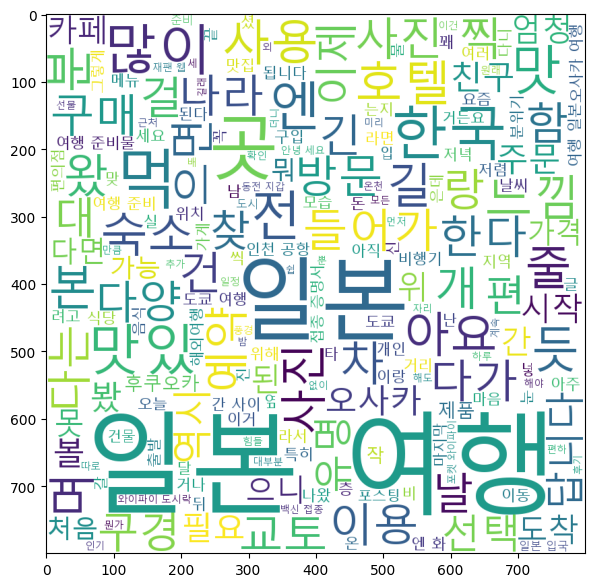

In [9]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud('일본'))
plt.show()

#### <font color = 'navy'> 미국

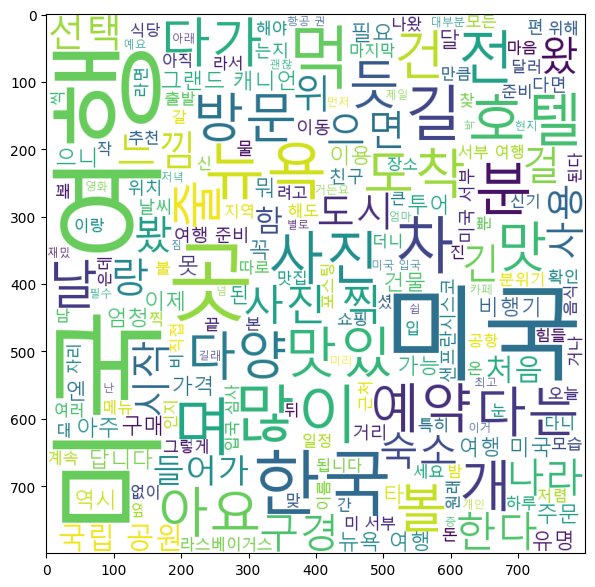

In [10]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud('미국'))
plt.show()

#### <font color = 'navy'> 태국

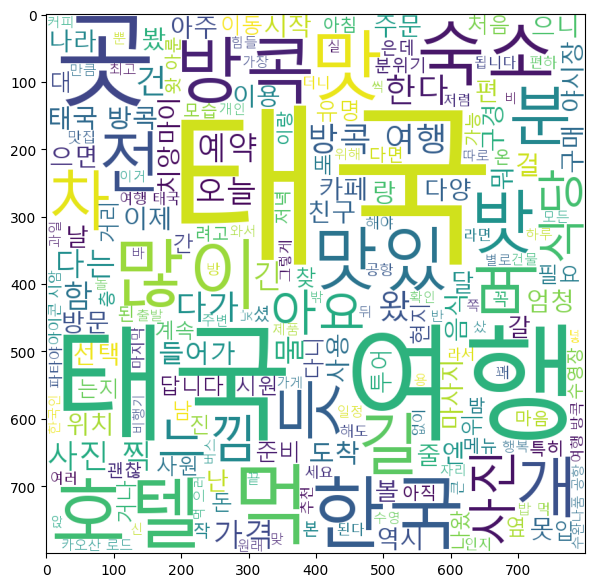

In [11]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud('태국'))
plt.show()

#### <font color = 'navy'> 이탈리아

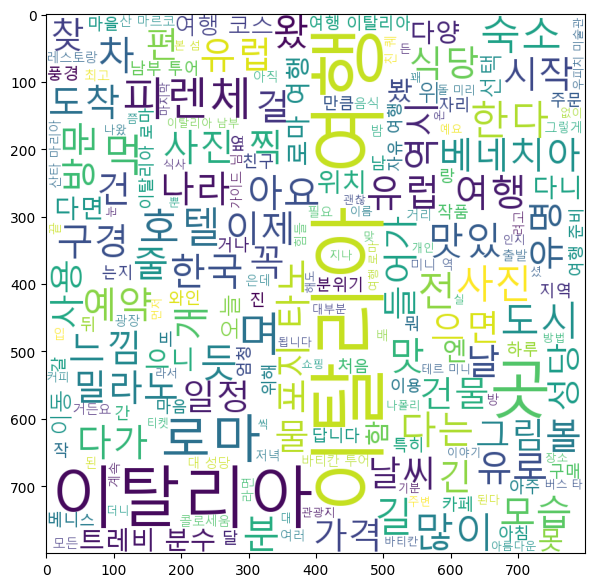

In [12]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud('이탈리아'))
plt.show()

#### <font color = 'navy'> 프랑스

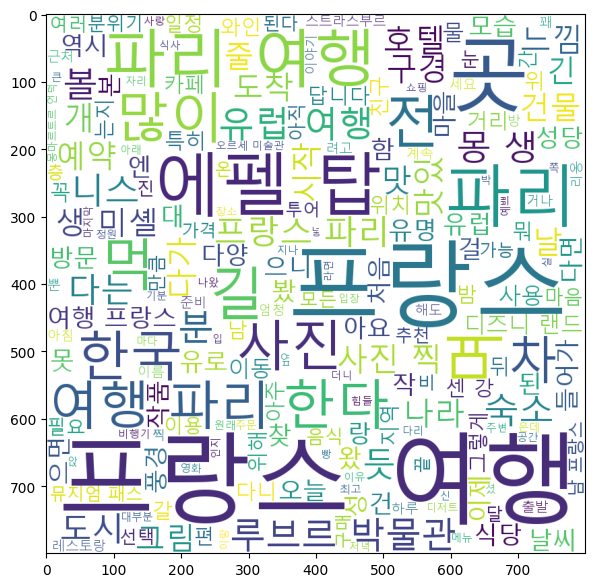

In [13]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud('프랑스'))
plt.show()

## <font color = 'navy'> 2. Topic Modeling (LDA)

In [4]:
Japan = data[data['country'] == '일본']
USA = data[data['country'] == '미국']
Thailand = data[data['country'] == '태국']
Italy = data[data['country'] == '이탈리아']
France = data[data['country'] == '프랑스']

In [5]:
from nltk.tokenize import TreebankWordTokenizer
import gensim
from gensim import corpora
import pyLDAvis.gensim_models

In [6]:
# LDA 모델 생성 함수

def LDA_modeling(country):
    
    # 문서에서 단어의 frequency 계산
    content_word = country['preprocessed_content'].apply(lambda x: x.split())
    word_dict = corpora.Dictionary(content_word)
    corpus = [word_dict.doc2bow(text) for text in content_word]
                                   
    # LDA 모델 훈련 (Topic 4개로 설정)
    n_topics = 4
    LDA_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = n_topics, id2word=word_dict, passes = 100)
    
    # LDA 시각화를 위한 객체
    vis = pyLDAvis.gensim_models.prepare(LDA_model, corpus, word_dict)
    
    # LDA 모델 및 시각화 객체 반환
    return LDA_model, vis

#### <font color = 'navy'> 일본

In [7]:
Japan_LDA, Japan_vis = LDA_modeling(Japan)

In [8]:
pyLDAvis.enable_notebook()
pyLDAvis.display(Japan_vis)

#### <font color = 'navy'> 미국

In [9]:
USA_LDA, USA_vis = LDA_modeling(USA)
pyLDAvis.display(USA_vis)

#### <font color = 'navy'> 태국

In [10]:
Thailand_LDA, Thailand_vis = LDA_modeling(Thailand)
pyLDAvis.display(Thailand_vis)

#### <font color = 'navy'> 이탈리아

In [11]:
Italy_LDA, Italy_vis = LDA_modeling(Italy)
pyLDAvis.display(Italy_vis)

#### <font color = 'navy'> 프랑스

In [12]:
France_LDA, France_vis = LDA_modeling(France)
pyLDAvis.display(France_vis)